In [7]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots

In [16]:
n = 50
p = 0.2
eta = 0.3

compGraph = generateGraphMUN(n, p, eta);
comparison_graph = generateGraphERO(n, p, eta)
B = magneticIncidence(compGraph);

T = Array{Complex}(undef, 2)
L = B*B';
T = L\B;
#levScores = real(diag(B'*T));

MethodError: MethodError: no method matching oneunit(::Type{Any})
Closest candidates are:
  oneunit(::Type{Union{Missing, T}}) where T at missing.jl:105
  oneunit(::Type{T}) where T at number.jl:319
  oneunit(::T) where T at number.jl:318
  ...

In [12]:
rng = Random.default_rng()
q = 0.0
crsf = multi_type_spanning_forest(rng, compGraph, q)


{50, 50} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [13]:
t = 3
sparseL = zeros(n,n);
w_tot = 0;
for i = 1:t
    crsf = multi_type_spanning_forest(rng, compGraph, q)
    D = props(crsf);
    w = D[:weight];
    w_tot += w;
    print(w, " ")
    sparseB = magneticIncidence(crsf);
    ind_e = mtsf_edge_indices(crsf, compGraph);
    W = diagm(1 ./ levScores[ind_e])
    sparseL = sparseL + w*sparseB*W*sparseB';
end
sparseL = sparseL/w_tot;

UndefVarError: UndefVarError: levScores not defined

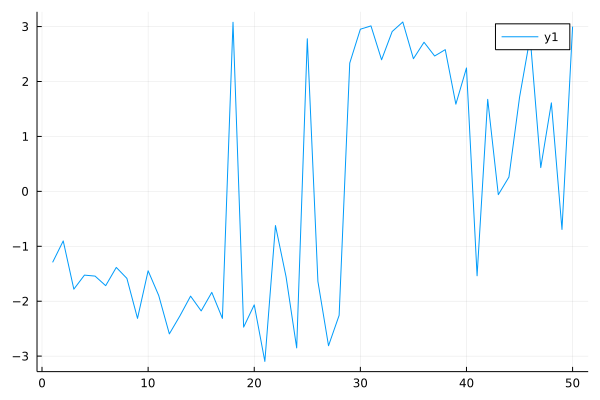

In [227]:
lam,v = eigs(sparseL, nev=1, which=:SM);
score = angular_score(v);
plot(score)

In [228]:
[real(eigvals(L)) real(eigvals(sparseL))]

50×2 Matrix{Float64}:
  0.0215146   1.30168
  2.27007     1.51395
  2.60562     1.83893
  3.85754     2.10108
  3.96171     2.43024
  4.33079     2.787
  4.53085     3.08778
  5.00578     3.18244
  5.33415     3.44425
  5.44624     3.83271
  ⋮          
 14.2722     15.4856
 14.4344     15.8789
 14.7453     17.1345
 15.5317     17.6401
 16.1464     18.6945
 16.4415     19.4304
 16.6286     20.3423
 17.3213     21.4228
 18.2361     23.1258

In [184]:
[cond(L) cond(inv(sparseL)*L)]

1×2 Matrix{Float64}:
 847.614  644.762

In [185]:
connected_components(crsf)

1-element Vector{Vector{Int64}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  41, 42, 43, 44, 45, 46, 47, 48, 49, 50]

In [186]:
length(cycle_basis(crsf.graph))

1

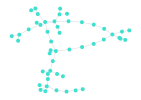

In [187]:
gplot(crsf)

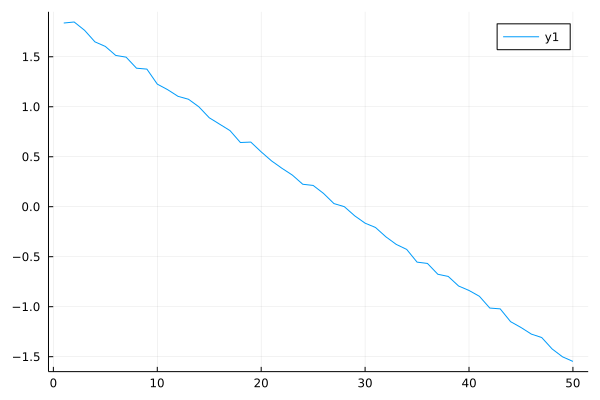

In [203]:
lam,v = eigs(L, nev=1, which=:SM);
score = angular_score(v);

plot(score)

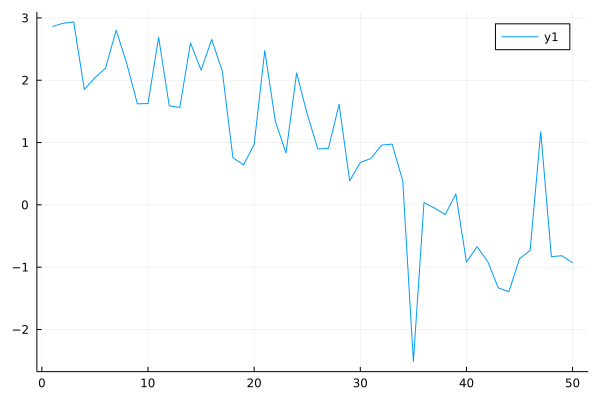

In [210]:
lam,v = eigs(sparseL, nev=1, which=:SM);
score = angular_score(v);
plot(score)